# Algorithmic Question

# [AQ1]

What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

The proposed algorithm returns all the possible permutations of the N (distinct) elements of the list.
The output is generated simply by running the function f2, in fact this function in its definition calls the function f1 which prints in succession all the elements of the sequence that is provided (which each time will be one of the N! possible permutations).
The function f2 instead calls itself in its definition by incrementing start by 1, thus making this a recursive algorithm. In its development, function f2 provides function f1 as a sequence each time with a different permutation of the input list, and it does so by exploiting the fact that in an array of N elements, by setting one, all possible permutations can be obtained starting from the permutations of the remaining N-1 elements and combining the N-th in all possible ways with these permutations. And it is precisely for this reason that the algorithm is recursive, in fact to calculate all the permutations of N-1 elements it calls the function f2 by increasing start by 1, this increase in fact causes the array shorter than 1 to be considered where it is excluded the first element (or the start element of the call preceding at the generic step). In the call of f2 then exchanges are continuously performed between the element in the start position and the element in position i (i.e. in the first three assignments), where i moves from the start value to the end value, and this procedure is repeated until each element of the array does not play the role of a "fixed" element and therefore there is a need to swap it at each iteration in the current start position (i.e. what is done in the last three assignments).


What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

$$  T(0,N)=(N-1)T(1,N)=(N-1)T(0,N-1)=(N-1)(N-2)T(0,N-2)=\dots =\prod_{i=1}^j (N-i)T(0,N-j)=\dots =(N-1)!T(0,1) $$
$$ T(N)=O(N!) $$

Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

This is not the optimal alhorithm to produce this output:

In [2]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [63]:
#N : an integer
#List : array of characters of length N without repetition
import numpy as np
def perm(sequence,N):
  range = np.arange(0,N+1)
  i = 1
  print(sequence)
  while i<N:
    range[i]-=1 
    if i%2 == 0:
      j = 0
    else:
      j = range[i]  
    temp = sequence[j] 
    sequence[j] = sequence[i]
    sequence[i] = temp 
    print(sequence)
    i=1
    while range[i] == 0:
      range[i]=i
      i+=1

#perm(List,N)

# [AQ2] 

Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

In [4]:
def exponential_max_finder(n):
  if n==1:
   return 1
  m=0
  for x in range(1,n):
    k=exponential_max_finder(n-x)
    if k*x>m:
      m=k*x
    elif (n-x)*x>m:
      m=(n-x)*x
  return m

The algorithm breaks the number n into two parts in all possible ways, dividing n into x and n-x.
After which it recalls itself for n-x, so as to consider the maximum number obtainable for all numbers smaller than it.
Finally at each passage it updates m if possible with the maximum between k * x and (n-x) * x.

Show that the algorithm has exponential running time.

$$ T(n)=\sum_{i=1}^{n-1}T(n-i)=T(n-1)+T(n-2)+\dots+T(1)=\sum_{i=1}^{n-2}T(n-i)+ \sum_{i=1}^{n-3} T(n-i)+\dots+T(1)\geq$$
$$\geq (n-2)T(1)+(n-3)T(1)+\dots+2T(1)+T(1)\geq2T(1)+2T(1)+\dots+2T(1)+T(1)=2^{n-3}T(1)+T(1) $$
$$ T(n)=O(2^n) $$

Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

In [5]:
def linear_max_finder(n):
  if n==2:
    return 1
  if n==3:
    return 2  
  step=np.arange(n+1)
  for x in range(2,n+1):
    for y in range(1,x):
      step[x]=max(step[x], y*(x-y), y*step[x-y], step[y]*(x-y), step[y]*step[x-y])
  return step[n]

$$ T(n)=(n-2)\sum_{y=1}^x(n-y)\geq (n-2)(n-x) * x $$
$$ T(n)=O(n^2) $$

Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

In [60]:
result_lin_y=np.zeros(24)
result_lin_x=np.zeros(24)
for i in range(2,26):
  result_lin_y[i-2] = timeit.timeit(stmt='linear_max_finder(i)', globals=globals(), number=1)
  result_lin_x[i-2] = i
result_exp_y=np.zeros(24)
result_exp_x=np.zeros(24)
for i in range(2,26):
  result_exp_y[i-2] = timeit.timeit(stmt='exponential_max_finder(i)', globals=globals(), number=1)
  result_exp_x[i-2] = i

<BarContainer object of 24 artists>

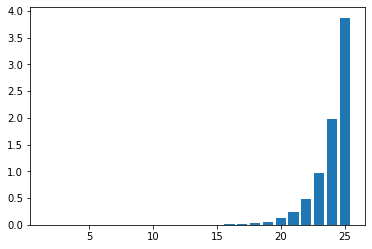

In [62]:
plt.bar(result_exp_x,result_exp_y)

<BarContainer object of 24 artists>

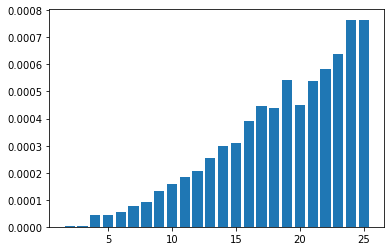

In [61]:
plt.bar(result_lin_x, result_lin_y)

From the graphs it is clear how the running time of the first algorithm has an exponential growth with respect to N, while the second has a polynomial growth.

(Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail.

I prove that the result can be obtained in constant time.
I divide n into $ n / x $ equal parts of length x, the product of these parts will be $x^{n/x}$.
To know for what value of x this product is maximum I study the derivative:
$$(x^{n/x})'=x^{n/x}(-\frac{n}{x^2}ln(x)+\frac{n}{x^2})=x^{n/x}\frac{n}{x^2}(1-ln(x)) $$
$$ x^{n/x}\frac{n}{x^2}(1-ln(x))=0 <=> 1-ln(x)=0 <=> x=e $$
$e$ is not an integer but $2<e<3$ so I should break n into parts of length 2 or 3.
I also observe that whenever I have 3 parts of length 2 their product is 8, so I should take two parts of length 3 ($3*3=9$).
So to maximize the product it is better to break n into parts of length 3 and at most two parts of length 2.

In [64]:
def constant_max_finder(n):
    if n==2:
        return 1
    if n==3:
        return 2
    if n%3==0:
        return 3**(n//3)
    elif n%3==1:
        return 3**(n//3-1)*2*2
    else:
        return 3**(n//3)*2